# Clustering Countries with the Elbow Method

When clustering data it's important to find the most optimal number of clusters. In this analysis the WCSS (Within Cluster Sum of Squares) is used to find this number of clusters. The "elbow method" is used for visualization. 

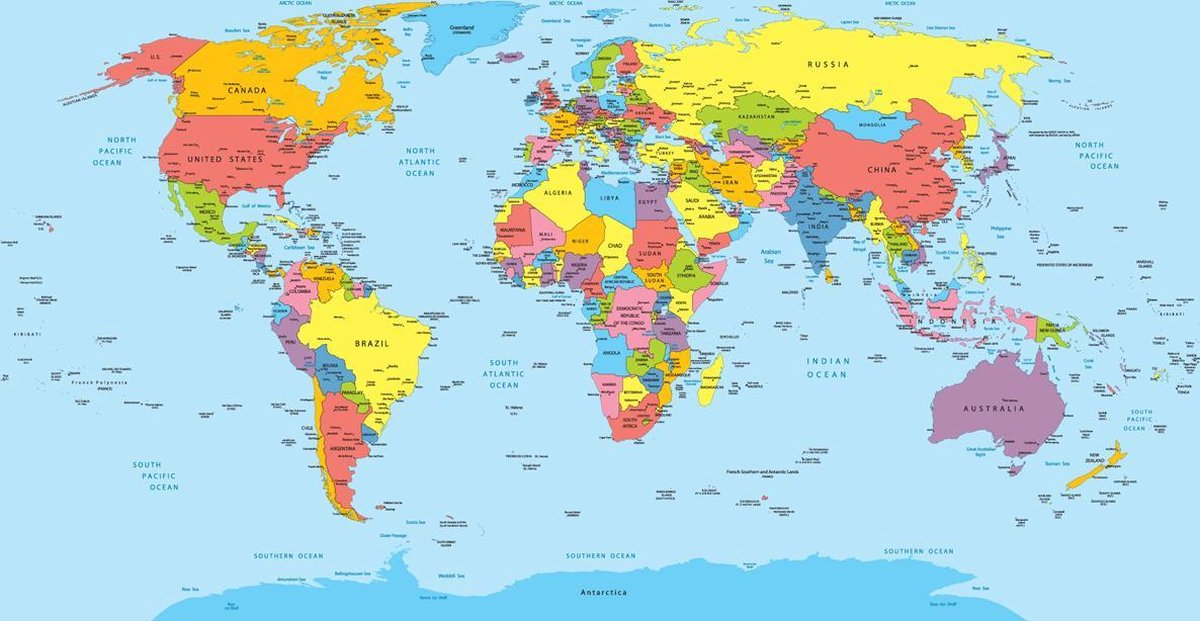

In [227]:
from IPython.display import Image
Image(filename='worldmap.jpg')

Realistic world map

In [176]:
import pandas as pd
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Example 1

#### What is optimal number of clusters when clustering 6 countries based on their language? 

In [177]:
data = pd.read_csv('3.01_Country_clusters.csv')

The 6 countries - in which 3 different languages are spoken - used for the first clustering. 

In [178]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In this table the languages are converted to a number. 

In [179]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [229]:
x = data_mapped.iloc[:,1:4]

In [230]:
kmeans = KMeans(2)

In [231]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [232]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [ ]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

The six countries grouped by their latitude and longitude. Their location corresponds with the world map at the top. 

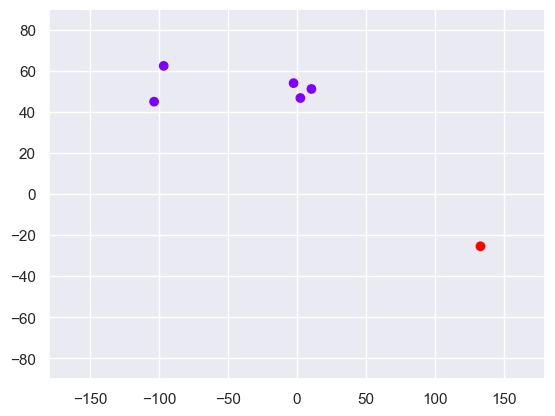

In [234]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [235]:
kmeans.inertia_

13208.958119999996

In [ ]:

wcss=[]
    
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

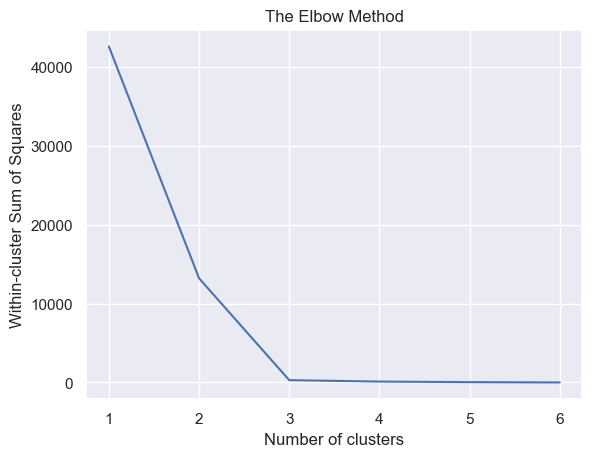

In [238]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

As expected, this plot shows that for this example 3 is the optimal number of clusters. The WCSS is as low as possible as well as the number of clusters. 

### Example 2

In this example WCSS is used to determine the optimal number of clusters when clustering all countries in the world based on the latitude and longitude of each country.

In [239]:
import pandas as pd
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

The latitude and longitude of all countries (only part of it is shown).

In [240]:
df = pd.read_csv("all_countries.csv")
df = df.iloc[:,1:3]
df = df.round(2)
df = df.dropna()

df

,latitude,longitude
0,42.55,1.60
1,23.42,53.85
2,33.94,67.71
3,17.06,-61.80
4,18.22,-63.07
...,...,...
240,15.55,48.52
241,-12.83,45.17
242,-30.56,22.94
243,-13.13,27.85


In [241]:
x2 = df.iloc[:,1:2]
#x2 = df.drop('Country', axis=1)

kmeans = KMeans(5)

In [242]:
kmeans.fit(x2)

KMeans(n_clusters=5)

In [243]:
identified_clusters_2 = kmeans.labels_

Table of countries with their latitude and longitude and the cluster in which they are classified.

In [244]:
df_with_clusters = df2.reset_index(drop=True).copy()
df_with_clusters['cluster'] = identified_clusters_2
df_with_clusters

,latitude,longitude,cluster
0,42.55,1.60,4
1,23.42,53.85,0
2,33.94,67.71,0
3,17.06,-61.80,2
4,18.22,-63.07,2
...,...,...,...
239,15.55,48.52,0
240,-12.83,45.17,0
241,-30.56,22.94,4
242,-13.13,27.85,0


Countries clustered by their latitude and longitude, resulting in clusters per continent. The resulting shape looks like a world map. 

<function matplotlib.pyplot.show(close=None, block=None)>

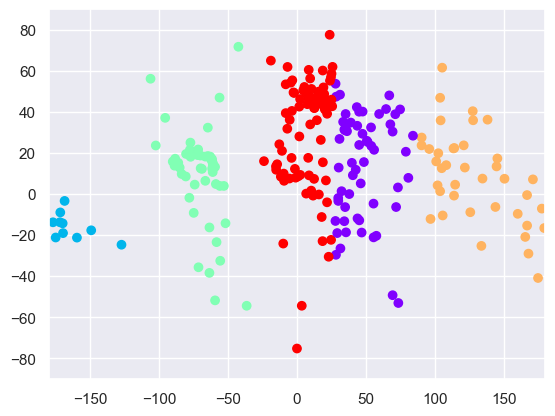

In [245]:
plt.scatter(df_with_clusters['longitude'], df_with_clusters['latitude'],
            c=df_with_clusters['cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt. ylim(-90, 90)


plt.show


In [246]:
kmeans.inertia_

69339.06184367162

In [ ]:
wcss = []

cl_num = 11
for i in range (1,7):
    kmeans= KMeans(i)
    kmeans.fit(x2)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

The plot resulting from using the WCSS looks like an elbow. 

Text(0, 0.5, 'Within-cluster Sum of Squares')

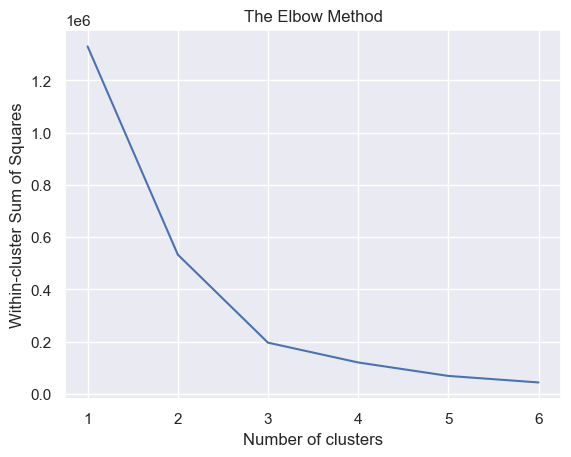

In [228]:
number_clusters_2 = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

As expected the optimal number to cluster all the countries of the world is 5 (continents). The weakening of the line can be explained by the location/small distance between of some of the continents. 